# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](./data/images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import datetime
print(str(datetime.datetime.today()).split()[0], " ", str(datetime.datetime.today()).split()[1])

2018-11-28   18:34:26.836701


In [2]:
import sys
sys.path.append("c:\\Users\\M\\Anaconda3\\Lib\\site-packages")

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("./data/lfw/lfw/*/*"))
dog_files = np.array(glob("./data/dogimages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13232 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


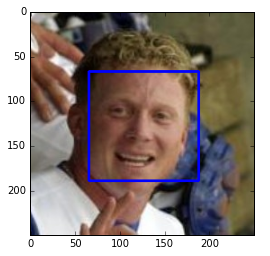

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('./data/haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell) <br>    
Percentage of images in human_files detecting human face: 96.000000% <br>
Percentage of images in dog_files detecting human face: 18.000000% 

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_cnt = 0
dog_cnt = 0

for img in tqdm(human_files_short):
    if face_detector(img):
        human_cnt = human_cnt + 1
        
for img in tqdm(dog_files_short):
    if face_detector(img):
        dog_cnt = dog_cnt + 1

print("Percentage of images in human_files detecting human face: %2f%% " % float(human_cnt / len(human_files_short) * 100))
print("Percentage of images in dog_files detecting human face: %2f%% " % float(dog_cnt / len(dog_files_short) * 100))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.36it/s]


Percentage of images in human_files detecting human face: 96.000000% 
Percentage of images in dog_files detecting human face: 18.000000% 


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [7]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [8]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\M/.torch\models\vgg16-397923af.pth
100%|███████████████████████████████████████████████████████████████| 553433881/553433881 [02:45<00:00, 3504599.86it/s]


In [9]:
print(VGG16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    #VGG16.classifier
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)
    
    size = 224
    Normalize = transforms.Normalize(mean = (0.485, 0.456, 0.406), 
                                     std = (0.229, 0.224, 0.225))
    transform = transforms.Compose([transforms.Resize(225),
                                    transforms.CenterCrop(size),
                                    transforms.ToTensor(),
                                    Normalize])

    img = transform(img)
    if use_cuda:
        img = img.cuda()

    img = img.unsqueeze(0)
    VGG16.eval()
    output = VGG16(img)
    predict = output.data.argmax(dim=1)
    return predict.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predict = VGG16_predict(img_path)
    return ((predict <= 268) & (predict >= 151)) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__      
Percentage of images in human_files detecting dog face: 0.000000% <br>
Percentage of images in dog_files detecting dog face: 93.000000% 

In [12]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_cnt = 0
dog_cnt = 0

for img in tqdm(human_files_short):
    if dog_detector(img):
        human_cnt = human_cnt + 1
        
for img in tqdm(dog_files_short):
    if dog_detector(img):
        dog_cnt = dog_cnt + 1

print("Percentage of images in human_files detecting dog face: %2f%% " % float(human_cnt / len(human_files_short) * 100))
print("Percentage of images in dog_files detecting dog face: %2f%% " % float(dog_cnt / len(dog_files_short) * 100))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:28<00:00,  1.17it/s]


Percentage of images in human_files detecting dog face: 0.000000% 
Percentage of images in dog_files detecting dog face: 93.000000% 


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

### ResNet-50 and Inception-V3 models
<b>Results from ResNet-50:</b> <br>
Percentage of images in human_files detecting dog face from ResNet model: 1.000000% <br>
Percentage of images in dog_files detecting dog face from ResNet model: 96.000000% <br>

<b>Results from Inception-V3:</b> <br>
Percentage of images in human_files detecting dog face from Inception model: 0.000000% <br>
Percentage of images in dog_files detecting dog face from Inception model: 95.000000% <br>

Of the three models trained, ResNet-50 model gave best performance at 96%.

In [14]:
def model_predict(img_path, pmodel, reset_size=False):
    '''
    Use pre-trained model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to pmodel (Inception-V3, ResNet-50) model's prediction
    '''
    # ResNet-50 and Inception-V3 classifiers
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # This function takes in model and processes the image on that model. 
    # InceptionV3 model takes size 299 and resize 329. by default reset_size is set to false. If InceptionV3 is passed
    # reset_size is set to true, and the following "if" condition checks reset_size and sets size and resize accordingly
    
    img = Image.open(img_path)
    
    #for InceptionV3, size is 299 and resize is 329
    if reset_size == True:
        size = 299
        resize = 329
    else:
        size = 224
        resize = 225
    Normalize = transforms.Normalize(mean = (0.485, 0.456, 0.406), 
                                     std = (0.229, 0.224, 0.225))
    transform = transforms.Compose([transforms.Resize(resize),
                                    transforms.CenterCrop(size),
                                    transforms.ToTensor(),
                                    Normalize])

    img = transform(img)
    if use_cuda:
        img = img.cuda()

    img = img.unsqueeze(0)
    pmodel.eval()
    output = pmodel(img)
    predict = output.data.argmax(dim=1)
    return predict.item() # predicted class index

In [15]:
def model_dog_detector(img_path, pmodel, reset_size=False):
    ## TODO: Complete the function.
    predict = model_predict(img_path, pmodel, reset_size)
    return ((predict <= 268) & (predict >= 151)) # true/false

In [16]:
ResNet_model = models.resnet50(pretrained=True)

human_cnt = 0
dog_cnt = 0

for img in tqdm(human_files_short):
    if model_dog_detector(img, ResNet_model):
        human_cnt = human_cnt + 1
        
for img in tqdm(dog_files_short):
    if model_dog_detector(img, ResNet_model):
        dog_cnt = dog_cnt + 1

HResNetAccuracy = float(human_cnt / len(human_files_short) * 100)
DResNetAccuracy = float(dog_cnt / len(dog_files_short) * 100)
print("Percentage of images in human_files detecting dog face from ResNet model: %2f%% " % HResNetAccuracy)
print("Percentage of images in dog_files detecting dog face from ResNet model: %2f%% " % DResNetAccuracy)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\M/.torch\models\resnet50-19c8e357.pth
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.20it/s]


Percentage of images in human_files detecting dog face from ResNet model: 1.000000% 
Percentage of images in dog_files detecting dog face from ResNet model: 96.000000% 


In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Inception_model = models.inception_v3(pretrained=True)

human_cnt = 0
dog_cnt = 0

for img in tqdm(human_files_short):
    if model_dog_detector(img, Inception_model, True):
        human_cnt = human_cnt + 1
        
for img in tqdm(dog_files_short):
    if model_dog_detector(img, Inception_model, True):
        dog_cnt = dog_cnt + 1

HInceptionAccuracy = float(human_cnt / len(human_files_short) * 100)
DInceptionAccuracy = float(dog_cnt / len(dog_files_short) * 100)
print("Percentage of images in human_files detecting dog face from Inception model: %2f%% " % HInceptionAccuracy)
print("Percentage of images in dog_files detecting dog face from Inception model: %2f%% " % DInceptionAccuracy)


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to C:\Users\M/.torch\models\inception_v3_google-1a9a5a14.pth
100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.81it/s]


Percentage of images in human_files detecting dog face from Inception model: 0.000000% 
Percentage of images in dog_files detecting dog face from Inception model: 95.000000% 


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="./data/images/Brittany_02625.jpg" width="100"> | <img src="./data/images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="./data/images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="./data/images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="./data/images/Labrador_retriever_06457.jpg" width="150"> | <img src="./data/images/Labrador_retriever_06455.jpg" width="240"> | <img src="./data/images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [18]:
import os
from torchvision import datasets

# define folder paths
dog_path = "./data/dogImages/"
train_path = "./data/dogImages/train/"
valid_path = "./data/dogImages/valid/"
test_path = "./data/dogImages/test/"
human_path = "./data/lfw/"

In [19]:
# function to check if a file exists
def file_exists(path):
    return os.path.exists(path)

In [20]:
from PIL import Image
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGE = True

size = 224

Normalize = transforms.Normalize(mean = [0.484, 0.456, 0.406],
                                 std = [0.229, 0.224, 0.225])
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomResizedCrop(224),
                                      transforms.ToTensor(),
                                      Normalize])
valid_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.Resize(256),
                                      transforms.CenterCrop(size),
                                      transforms.ToTensor(),
                                      Normalize])
test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                      transforms.ToTensor(),
                                      Normalize])

In [21]:
batch_size = 20
num_workers = 0

In [22]:
train_data = datasets.ImageFolder(train_path, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

In [23]:
valid_data = datasets.ImageFolder(valid_path, transform=valid_transform)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

In [24]:
test_data = datasets.ImageFolder(test_path, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

In [25]:
# loaders dictionary
loaders_scratch = {'train': train_loader,
                   'valid': valid_loader,
                   'test': test_loader}

In [26]:
train_classes = len(train_data.classes)
valid_classes = len(valid_data.classes)
test_classes = len(test_data.classes)
print("Training breeds", train_classes)
print("Validation breeds", valid_classes)
print("Testing breeds", test_classes)

Training breeds 133
Validation breeds 133
Testing breeds 133


In [27]:
print("Train data ", len(train_data))
print("Validation data ", len(valid_data))
print("Test data ", len(test_data))

Train data  6680
Validation data  835
Test data  836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:<br>
- <b>How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?</b><br>
I am resizing the three datasets (train, valid and test) by resizing, cropping and rotating the images. <br> For train dataset, I have opted for random resized crop of size 224. I have given a random horizontal flip to the image.<br> For valid dataset, I have resized the image to 256 and given center crop of size 224. I have given a random horizontal flip to the image.<br> For test dataset, I have resized the image to 224 X 224. <br> All three datasets are normalized with mean and standard deviation of mean = [0.484, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. <br> All pretrained models expect input images normalized in the same way. https://pytorch.org/docs/master/torchvision/models.html <br> 
Input tensor has the default tensor size.

- <b>Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?</b> <br>
Yes, I have augmented the dataset by randomly flipping the image.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [28]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc2 = nn.Linear(500, train_classes)
        self.dropout = nn.Dropout(0.25) 
        self.batch_norm = nn.BatchNorm1d(num_features=500)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        
        x = x.view(x.size(0), -1)
        
        x = F.relu(self.batch_norm(self.fc1(x)))
        x = self.dropout(x)
        
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [29]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (batch_norm): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ <br>
<b>The steps I took to get to the final CNN architecture </b> <br>
1) Conv2D layer - this is the first layer. While using CNN for Image classification/recognition, the first layer is always the Convolution layer. Here we pass in the image size which is usually a three dimensional array. The network identifies the features of the image like recognizing the outlines. The following layers identify more complex features of the image.       
  I have passed in the image size range from 224 to 356; padding is same and activation is relu. The first filter is 16. Increased the filters to 32 and 64 in subsequent layers.    
2) MaxPooling2D - inserted pooling layer to reduce spatial size of the representation, this controls overfitting. MaxPooling2D uses MAX operation with filters of size 2X2.     
3) Dropout - dropout layer takes care of vanishing gradients and image augmentation for model performance     
4) Fully connected - this is the final fully connected layer. Dense layer implements the output. It transforms input information from hidden Layers to predict what object is contained in the image. Here the activation is the element-wise activation function passed as an argument. I have used relu activation.  
5) Batch Normalization:Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift)Also, batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers.


For image classification, a minimum of 3 layers is recommended. I have added 3 layers.      

Neural networks are mathematical models to solve an optimization problem.      
Convolutional Neural Network (CNN) is a deep feed forward artificial neural networks, most commonly applied to analyzing visual imagery. CNNs use multilayer perceptrons designed to require minimal preprocessing.     
CNN consists of an input and an output layer as well as multiple hidden layers. The hidden layers of a CNN typicaly consist of convolutional layers, pooling layers, fully connected layers and normalization layers.    

Torch is a machine learning library providing a series of the state-of-the-art algorithms such as Neural Networks, Support Vector Machines, Gaussian Mixture Models, Hidden Markov Models and many others. Torchvision provides additional functionalities to manipulate and process images with standard image processing algorithms. Hence, the resulting images can be used directly with the Torch machine learning algorithms as Torchvision is fully integrated with Torch. 

Torchvision has pretrained models that are ready to use for image processing. https://chsasank.github.io/vision/models.html


### (IMPLEMENTATION) Specify Loss Function and Optimizer<br>
Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [30]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [31]:
from datetime import time
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    print("start time: ", str(datetime.datetime.today()).split()[0], " ", str(datetime.datetime.today()).split()[1])
    print("n_epochs: ", n_epochs)
    print("model: ", model)
    start = time()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        print("Now running epoch -->", epoch)
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            
            outputs = model(data)
            
            if isinstance(outputs, tuple):
                loss = sum((criterion(op, target) for op in outputs))
            else:
                loss = criterion(outputs, target)
                
            loss.backward()
            
            optimizer.step()
            
            train_loss += loss.item() * data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                output = model(data)

                loss = criterion(output, target)

                valid_loss += loss.item() * data.size(0)
                
        train_loss = train_loss / len(loaders['train'].dataset)
        
        valid_loss = valid_loss / len(loaders['valid'].dataset)
        
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print("Validation loss decreased from ({:.6f} ----> {:.6f}).\t Saving model....".format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        print("end time: ", str(datetime.datetime.today()).split()[0], " ", str(datetime.datetime.today()).split()[1])
        
    # return trained model
    return model

# I have moved this code to the next cell
#if file_exists("./model_scratch.pt"):
#    model_scratch.load_state_dict(torch.load("model_scratch.pt"))

In [32]:
epochs = 25

# train the model
model_scratch = train(epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

print("....Loading model....")

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

start time:  2018-11-28   18:44:23.463500
n_epochs:  25
model:  Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (batch_norm): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Now running epoch --> 1
Epoch: 1 	Training Loss: 4.805212 	Validation Loss: 4.866457
Validation loss decreased from (inf ----> 4.866457).	 Saving model....
end time:  2018-11-28   18:52:27.134024
Now running epoch --> 2
Epoch: 2 	Training Loss: 4.677888 	Validation Loss: 4.838437
Validation loss decreased from (4.866457 ----> 4.838437).	 Saving model....
end t

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [33]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.828729


Test Accuracy: 12% (104/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [34]:
## TODO: Specify data loaders

loaders_transfer = {"train": train_loader,
                    "valid": valid_loader,
                    "test": test_loader
                   }

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [35]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# Since we got best accuracy with Resnet50, we are using Resnet50
model_transfer = models.resnet50(pretrained=True)
if use_cuda:
    model_transfer = model_transfer.cuda()

In [36]:
for param in model_transfer.parameters():
    param.require_grad = False
    
classes = len(train_data.classes)
in_fts = model_transfer.fc.in_features

model_transfer.fc = nn.Linear(in_fts, classes)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ <br>
<b>The steps I took to get to the final CNN architecture:</b>      
First, I defined 3 architectures VGG16, ResNet50 and InceptionV3 with MaxPool2D as pooling layer and relu activation. I then trained the models. I picked the model with better accuracy. I am listing below the model name and the accuracy. 

|Model name  |Accuracy|
|:----------:|:------:|
|VGG16       | 93%    |
|ResNet50    | 96%    |
|InceptionV3 | 95%    |

<b>Describe why you think the architecture is suitable for the current problem.</b> <br>
All 3 architectures are pretrained on ImageNet. VGG16 was the recommended model for use with this project. I also trained the data on Resnet50 and InceptionV3. Of the three models, I got better accuracy with Resnet50. I have used Resnet50 in this project.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [37]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [38]:
# train the model
print("model_transfer creating")
n_epochs = 2      #4
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

model_transfer creating
start time:  2018-11-28   22:05:34.948860
n_epochs:  2
model:  ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsamp

)
Now running epoch --> 1
Epoch: 1 	Training Loss: 2.489881 	Validation Loss: 0.855168
Validation loss decreased from (inf ----> 0.855168).	 Saving model....
end time:  2018-11-28   23:11:01.416467
Now running epoch --> 2
Epoch: 2 	Training Loss: 1.236880 	Validation Loss: 0.613896
Validation loss decreased from (0.855168 ----> 0.613896).	 Saving model....
end time:  2018-11-29   00:16:04.665967


In [39]:
# load the model that got the best validation accuracy (uncomment the line below)
print("..load model....")
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

..load model....


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [40]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.729586


Test Accuracy: 77% (644/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [41]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    img = Image.open(img_path)
    
    size = 224
    resize = 225
    Normalize = transforms.Normalize(mean = (0.485, 0.456, 0.406), 
                                     std = (0.229, 0.224, 0.225))
    transform = transforms.Compose([transforms.Resize(resize),
                                    transforms.CenterCrop(size),
                                    transforms.ToTensor(),
                                    Normalize])

    img = transform(img)
    if use_cuda:
        img = img.cuda()

    img = img.unsqueeze(0)
    model_transfer.eval()
    output = model_transfer(img)
    index = output.data.argmax(dim=1)
    
    dog_breed = class_names[index]
    
    probabilities = F.softmax(output)
    confidence = probabilities.data.max(dim=1)[0]
    
    return dog_breed, confidence.item()

In [42]:
#predict breed from images folder
img_path = "./data/images/"
for img_file in os.listdir(img_path):
    if img_file.find('sample') == -1:
        predicted_breed, confd = predict_breed_transfer(img_path+img_file)
        confd = confd * 100
        confd = "%.2f"%confd
        print("Image File: {0} \t Predicted breed: {1} ".format(img_file, predicted_breed))

C:\Users\M\Anaconda3\envs\Python3.5\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Image File: American_water_spaniel_00648.jpg 	 Predicted breed: American water spaniel 
Image File: Brittany_02625.jpg 	 Predicted breed: Brittany 
Image File: Curly-coated_retriever_03896.jpg 	 Predicted breed: Curly-coated retriever 
Image File: Labrador_retriever_06449.jpg 	 Predicted breed: Labrador retriever 
Image File: Labrador_retriever_06455.jpg 	 Predicted breed: Labrador retriever 
Image File: Labrador_retriever_06457.jpg 	 Predicted breed: Labrador retriever 
Image File: Welsh_springer_spaniel_08203.jpg 	 Predicted breed: Welsh springer spaniel 


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](./data/images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [43]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    img_grey = cv2.imread(img_path)
    gray = cv2.cvtColor(img_grey, cv2.COLOR_BGR2GRAY)
    # load color (BGR) image
    img = cv2.imread(img_path)
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    is_human = face_detector(img_path)
    is_dog = dog_detector(img_path)
    
    faces = face_cascade.detectMultiScale(gray)
    faces_detected = len(faces)
    # Get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    # Predict using Resnet50
    predicted_breed, conf = predict_breed_transfer(img_path)
    conf = conf * 100
    conf = "%.2f"%conf
    
    if is_human and is_dog:
        print('\n Hello Human and Dog ')
        # Show image and remove axis
        plt.axis('off')
        plt.imshow(cv_rgb)
        plt.show()
        print('%d faces detected. Your breed looks like %s' % (faces_detected, predicted_breed))
    elif is_human:
        print('\n Hello Human ')
        # Show image and remove axis
        plt.axis('off')
        plt.imshow(cv_rgb)
        plt.show()
        print('%d Human faces detected. Your breed looks like %s' % (faces_detected, predicted_breed))
    elif is_dog:
        print('\n Hello Dog ')
        # Show image and remove axis
        plt.axis('off')
        plt.imshow(cv_rgb)
        plt.show()
        print('%d faces detected. Your breed is %s' % (faces_detected, predicted_breed))
    else:
        print('\n Hello Stranger ')
        # Show image and remove axis
        plt.axis('off')
        plt.imshow(cv_rgb)
        plt.show()
        print('%d faces detected. ' % (faces_detected))

    return


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ <br>
<b>Is the output better than you expected :) ?  Or worse :( ?  </b> <br>
The output is as expected. I passed in many dog images, all were predicted correctly. The code cell below passed in 3 human images and 3 dog images. All three dog images were identified correctly. <br> I then passed in images from my computer. The three dog images I passed were identified correctly. 

<b>Provide at least three possible points of improvement for your algorithm.</b><br>
Yes, there is definitely scope for improvement. My algorithm is trained for Resnet-50 model with 2 epochs. I have chosen Resnet-50 since it gave me the better accuracy over VGG16 and InceptionV3. The algorithm can be improved in
1. If an image is passed that has both human and dog face, the algorithm should be able to identify both human and dog images. The algorithm did not report both faces. It identified only one face and retured the breed.
2. I noticed that when I ran the algorithm multiple times, the same human face was detected with different breed.
3. This model was trained for 25 epochs and the final model for 2 epochs. It takes in a long time to train. In a real world, we do focus on accuracy, but spending lot of time on training could pose a problem. I have tested the model on different computers, increasing RAM seems to help, but it still takes up lots of time for training. Reducing the training time - is a major scope for improvement.

C:\Users\M\Anaconda3\envs\Python3.5\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



 Hello Human 


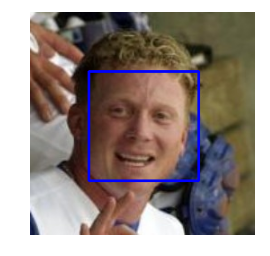

1 Human faces detected. Your breed looks like American water spaniel

 Hello Stranger 


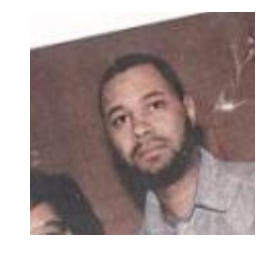

0 faces detected. 

 Hello Human 


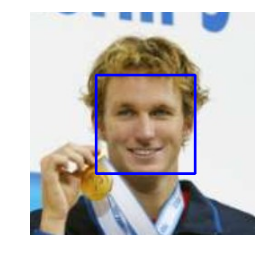

1 Human faces detected. Your breed looks like American water spaniel

 Hello Dog 


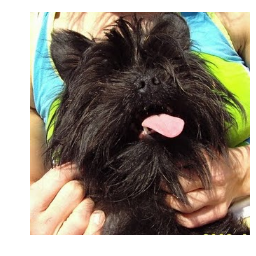

0 faces detected. Your breed is Affenpinscher

 Hello Dog 


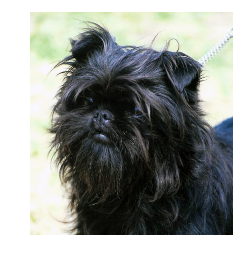

0 faces detected. Your breed is Affenpinscher

 Hello Dog 


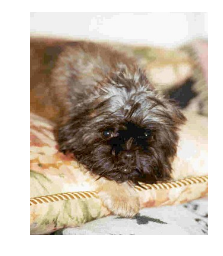

0 faces detected. Your breed is Affenpinscher


In [44]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Image passed:  amitabh_salman.jpg


C:\Users\M\Anaconda3\envs\Python3.5\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.



 Hello Human 


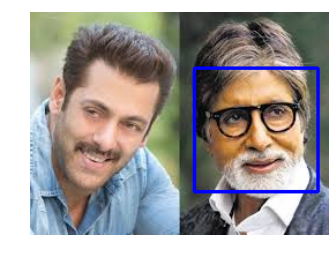

1 Human faces detected. Your breed looks like Xoloitzcuintli
Image passed:  anil_kapoor.jpg

 Hello Human 


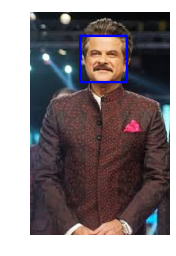

1 Human faces detected. Your breed looks like Xoloitzcuintli
Image passed:  Basenji_00973.jpg

 Hello Dog 


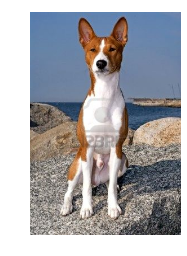

0 faces detected. Your breed is Basenji
Image passed:  Belgian_malinois_01402.jpg

 Hello Human and Dog 


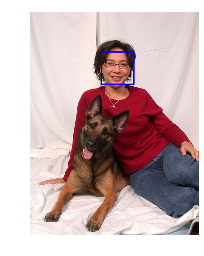

1 faces detected. Your breed looks like Belgian malinois
Image passed:  Belgian_malinois_01418.jpg

 Hello Dog 


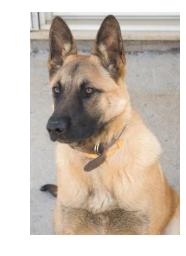

0 faces detected. Your breed is Belgian malinois
Image passed:  cow.JPG

 Hello Human 


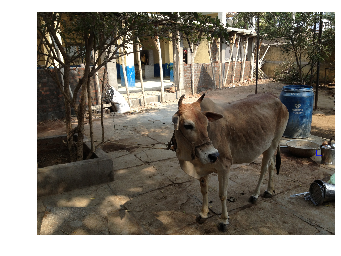

1 Human faces detected. Your breed looks like Xoloitzcuintli
Image passed:  cow_face.jpg

 Hello Stranger 


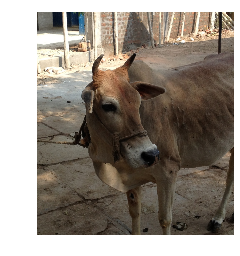

0 faces detected. 
Image passed:  Welsh_springer_spaniel_08199.jpg

 Hello Dog 


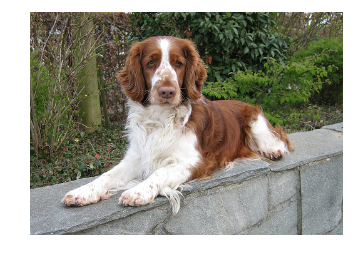

0 faces detected. Your breed is Welsh springer spaniel
Image passed:  Welsh_springer_spaniel_08210.jpg

 Hello Human and Dog 


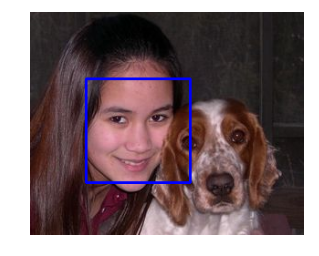

1 faces detected. Your breed looks like Welsh springer spaniel


In [45]:
img_path = "./data/images_from_computer/"
for img_file in os.listdir(img_path):
    if img_file.find('.png') == -1:
        print("Image passed: ", img_file)
        run_app(img_path+img_file)